# Descriptive Statistics Analysis of Patient Data

This project aims to perform a comprehensive descriptive statistics analysis on a 
dataset containing patient information. The primary focus is to calculate summary 
statistics for key numeric variables and explore the distribution of categorical variables. 
By leveraging statistical techniques, this project seeks to provide insights into patient demographics and healthcare utilization, ultimately aiding in better understanding trends and patterns in patient data.

# Load Data and Libraries

In [70]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
#Read data to a dataframe
Data = pd.read_csv("diabetic_data.csv")

In [72]:
Data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [73]:
#Check data size
Data.shape

(101766, 50)

## Data Cleaning and Preprocessing

In [74]:
#Select columns of interest
columns = ['age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                   'num_medications', 'race', 'gender', 'admission_type_id', 'discharge_disposition_id']


In [75]:
#Brief view of the data
subset_df=Data[columns]
subset_df.head(10)

,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,race,gender,admission_type_id,discharge_disposition_id
0,[0-10),?,1,41,0,1,Caucasian,Female,6,25
1,[10-20),?,3,59,0,18,Caucasian,Female,1,1
2,[20-30),?,2,11,5,13,AfricanAmerican,Female,1,1
3,[30-40),?,2,44,1,16,Caucasian,Male,1,1
4,[40-50),?,1,51,0,8,Caucasian,Male,1,1
5,[50-60),?,3,31,6,16,Caucasian,Male,2,1
6,[60-70),?,4,70,1,21,Caucasian,Male,3,1
7,[70-80),?,5,73,0,12,Caucasian,Male,1,1
8,[80-90),?,13,68,2,28,Caucasian,Female,2,1
9,[90-100),?,12,33,3,18,Caucasian,Female,3,3


In [76]:
#Check size of data
subset_df.shape

(101766, 10)

In [77]:
#Check the datatype of each column
subset_df.dtypes

age                         object
weight                      object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
race                        object
gender                      object
admission_type_id            int64
discharge_disposition_id     int64
dtype: object

In [118]:
# Convert columns to 'object' type using .loc[] 
subset_df.loc[:, 'admission_type_id'] = subset_df['admission_type_id'].astype('object')
subset_df.loc[:, 'discharge_disposition_id'] = subset_df['discharge_disposition_id'].astype('object')

# Verify the data types
print(subset_df.dtypes)


age                         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
race                        object
gender                      object
admission_type_id           object
discharge_disposition_id    object
dtype: object


In [79]:
#check if there are null values
null_values = subset_df.isnull().sum()
print(null_values)

age                         0
weight                      0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
dtype: int64


In [80]:
#Replace '?' with NaN
subset_df = subset_df.replace('?', np.nan)

In [81]:
subset_df.head()

,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,race,gender,admission_type_id,discharge_disposition_id
0,[0-10),NaN,1,41,0,1,Caucasian,Female,6,25
1,[10-20),NaN,3,59,0,18,Caucasian,Female,1,1
2,[20-30),NaN,2,11,5,13,AfricanAmerican,Female,1,1
3,[30-40),NaN,2,44,1,16,Caucasian,Male,1,1
4,[40-50),NaN,1,51,0,8,Caucasian,Male,1,1


In [82]:
#Check for null values once again
null_values = subset_df.isnull().sum()
print(null_values)

age                             0
weight                      98569
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
race                         2273
gender                          0
admission_type_id               0
discharge_disposition_id        0
dtype: int64


In [83]:
#Drop the weight column
subset_df = subset_df.drop('weight', axis = 1)

In [84]:
subset_df.shape

(101766, 9)

In [85]:
#Drop Null values
subset_df = subset_df.dropna()

In [86]:
#check for null values once again
null_values = subset_df.isnull().sum()
print(null_values)

age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
race                        0
gender                      0
admission_type_id           0
discharge_disposition_id    0
dtype: int64


In [87]:
#Remove brackets from age column
subset_df['age'] = subset_df['age'].str.replace('[', '').str.replace(')', '')

In [88]:
subset_df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,race,gender,admission_type_id,discharge_disposition_id
0,0-10,1,41,0,1,Caucasian,Female,6,25
1,10-20,3,59,0,18,Caucasian,Female,1,1
2,20-30,2,11,5,13,AfricanAmerican,Female,1,1
3,30-40,2,44,1,16,Caucasian,Male,1,1
4,40-50,1,51,0,8,Caucasian,Male,1,1


## Summary Statistics Numerical Variables

In [89]:
# Get descriptive statistics for numeric variables
numeric_summary = subset_df.describe()
# Median Mode and Range  for time in hospital
median_time_in_hospital = subset_df['time_in_hospital'].median()
mode_time_in_hospital = subset_df['time_in_hospital'].mode()[0]
range_time_in_hospital = subset_df['time_in_hospital'].max() - subset_df['time_in_hospital'].min()

# Display the results
print("Summary Statistics for Numeric Variables:\n", numeric_summary)
print(f"\nMedian Time in Hospital: {median_time_in_hospital}")
print(f"Mode Time in Hospital: {mode_time_in_hospital}")
print(f"Range of Time in Hospital: {range_time_in_hospital}")

Summary Statistics for Numeric Variables:
        time_in_hospital  num_lab_procedures  num_procedures  num_medications
count      99493.000000        99493.000000    99493.000000     99493.000000
mean           4.398420           43.072588        1.340577        16.026605
std            2.986977           19.695858        1.703717         8.119790
min            1.000000            1.000000        0.000000         1.000000
25%            2.000000           31.000000        0.000000        10.000000
50%            4.000000           44.000000        1.000000        15.000000
75%            6.000000           57.000000        2.000000        20.000000
max           14.000000          132.000000        6.000000        81.000000

Median Time in Hospital: 4.0
Mode Time in Hospital: 3
Range of Time in Hospital: 13


## Summary Statistics Categorical Variables 

In [90]:
# Get descriptive statistics for categorical variables
categorical_summary = subset_df.describe(include='object')
# Display the results
print("Summary Statistics for categorical Variables:\n", categorical_summary)

Summary Statistics for categorical Variables:
           age       race  gender  admission_type_id  discharge_disposition_id
count   99493      99493   99493              99493                     99493
unique     10          5       3                  8                        26
top     70-80  Caucasian  Female                  1                         1
freq    25469      76099   53575              52900                     58768


### Frequency Counts

In [91]:
#Age
subset_df['age'].value_counts()


age
70-80     25469
60-70     21988
50-60     16895
80-90     16800
40-50      9465
30-40      3699
90-100     2724
20-30      1611
10-20       682
0-10        160
Name: count, dtype: int64

In [92]:
#Race
subset_df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [93]:
#Gender
subset_df['gender'].value_counts()

gender
Female             53575
Male               45917
Unknown/Invalid        1
Name: count, dtype: int64

In [94]:
#Admission Type
subset_df['admission_type_id'].value_counts()

admission_type_id
1    52900
3    18508
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: count, dtype: int64

In [95]:
# Discharge Disposition
subset_df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     58768
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

### Proportions

In [96]:
#Age
subset_df['age'].value_counts(normalize=True)

age
70-80     0.255988
60-70     0.221000
50-60     0.169811
80-90     0.168856
40-50     0.095132
30-40     0.037178
90-100    0.027379
20-30     0.016192
10-20     0.006855
0-10      0.001608
Name: proportion, dtype: float64

In [97]:
#Race
subset_df['race'].value_counts(normalize=True)

race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: proportion, dtype: float64

In [98]:
#Gender
subset_df['gender'].value_counts(normalize=True)

gender
Female             0.53848
Male               0.46151
Unknown/Invalid    0.00001
Name: proportion, dtype: float64

In [99]:
#Admission Type
subset_df['admission_type_id'].value_counts(normalize=True)

admission_type_id
1    0.531696
3    0.186023
2    0.178766
6    0.052516
5    0.047511
8    0.003186
7    0.000201
4    0.000101
Name: proportion, dtype: float64

In [100]:
#Discharge Disposition
subset_df['discharge_disposition_id'].value_counts(normalize=True)

discharge_disposition_id
1     0.590675
3     0.136834
6     0.127627
18    0.036917
2     0.020715
22    0.019911
11    0.016162
5     0.011488
25    0.009780
4     0.007689
7     0.006141
23    0.004081
13    0.003990
14    0.003709
28    0.001387
8     0.001075
15    0.000633
24    0.000482
9     0.000211
17    0.000141
16    0.000111
19    0.000080
10    0.000060
27    0.000050
12    0.000030
20    0.000020
Name: proportion, dtype: float64

### Pivot Tables

In [101]:
#Age vs Time in hospital and number of procedures
age=subset_df.pivot_table(index='age', values=['time_in_hospital','num_procedures'], aggfunc='mean')
age.columns = ['Mean Time in Hospital', 'Mean Number of Procedures']
age

,Mean Time in Hospital,Mean Number of Procedures
age,,
0-10,0.181250,2.550000
10-20,0.329912,3.208211
20-30,0.773433,3.568591
30-40,1.117599,3.802920
40-50,1.337771,4.046064
50-60,1.551820,4.128973
60-70,1.572812,4.387166
70-80,1.380698,4.595469
80-90,1.028214,4.804345


In [102]:
#Gender vs Time in hospital and number of procedures
gender=subset_df.pivot_table(index='gender', values=['time_in_hospital','num_procedures'], aggfunc='mean')
gender.columns = ['Mean Time in Hospital', 'Mean Number of Procedures']
gender

,Mean Time in Hospital,Mean Number of Procedures
gender,,
Female,1.244685,4.479832
Male,1.452381,4.303504
Unknown/Invalid,5.000000,1.000000


In [103]:
#Race vs Time in hospital and number of procedures
race=subset_df.pivot_table(index='race', values=['time_in_hospital','num_procedures'], aggfunc='mean')
race.columns = ['Mean Time in Hospital', 'Mean Number of Procedures']
race

,Mean Time in Hospital,Mean Number of Procedures
race,,
AfricanAmerican,1.234669,4.507860
Asian,1.344774,3.995320
Caucasian,1.369466,4.385721
Hispanic,1.116838,4.059892
Other,1.532537,4.273572


## Visualizations

#### Histograms

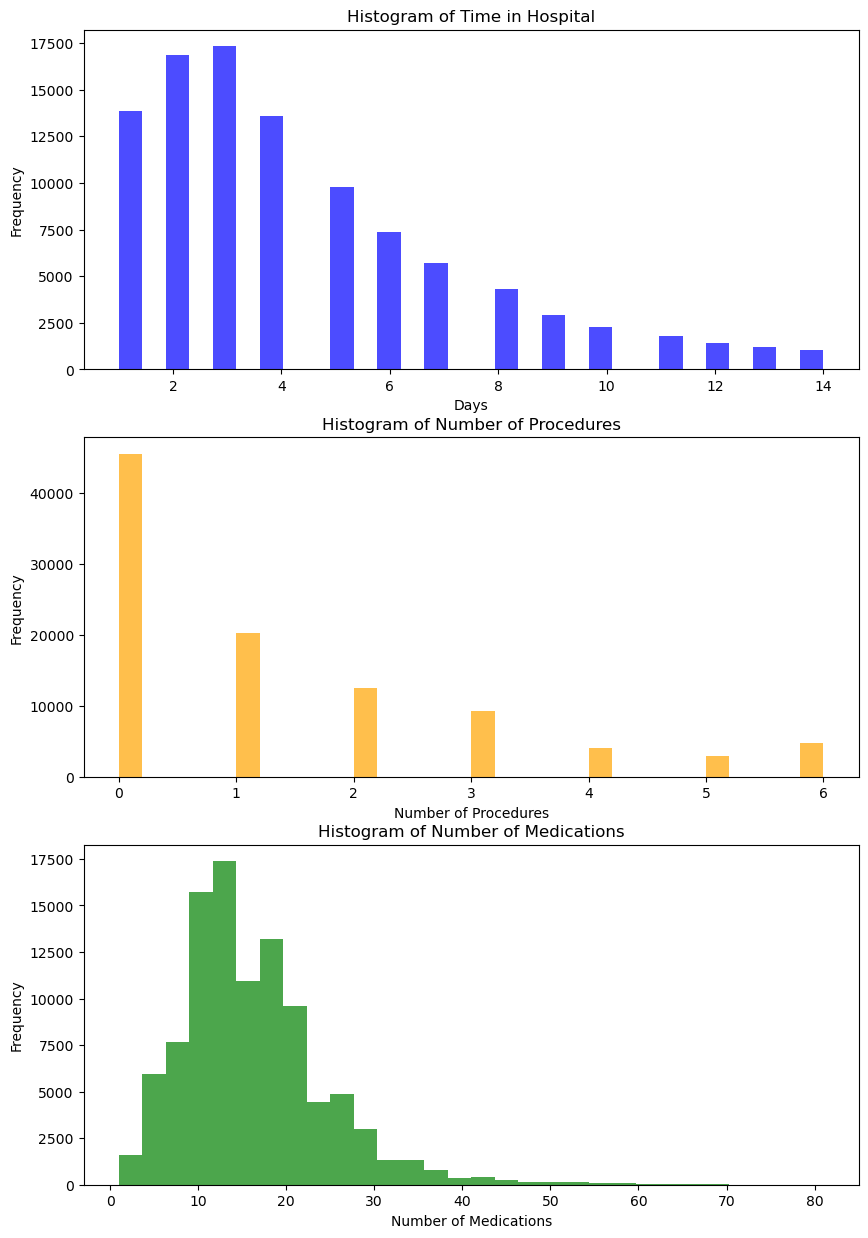

In [104]:
#Histograms of numerical variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))  # 3 rows, 1 column

# Histogram for Time in Hospital
axes[0].hist(subset_df['time_in_hospital'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Time in Hospital')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Frequency')

# Histogram for Number of Procedures
axes[1].hist(subset_df['num_procedures'], bins=30, color='orange', alpha=0.7)
axes[1].set_title('Histogram of Number of Procedures')
axes[1].set_xlabel('Number of Procedures')
axes[1].set_ylabel('Frequency')

# Histogram for Number of Medications
axes[2].hist(subset_df['num_medications'], bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of Number of Medications')
axes[2].set_xlabel('Number of Medications')
axes[2].set_ylabel('Frequency')

# Display the plot
plt.show()


#### Bar Charts

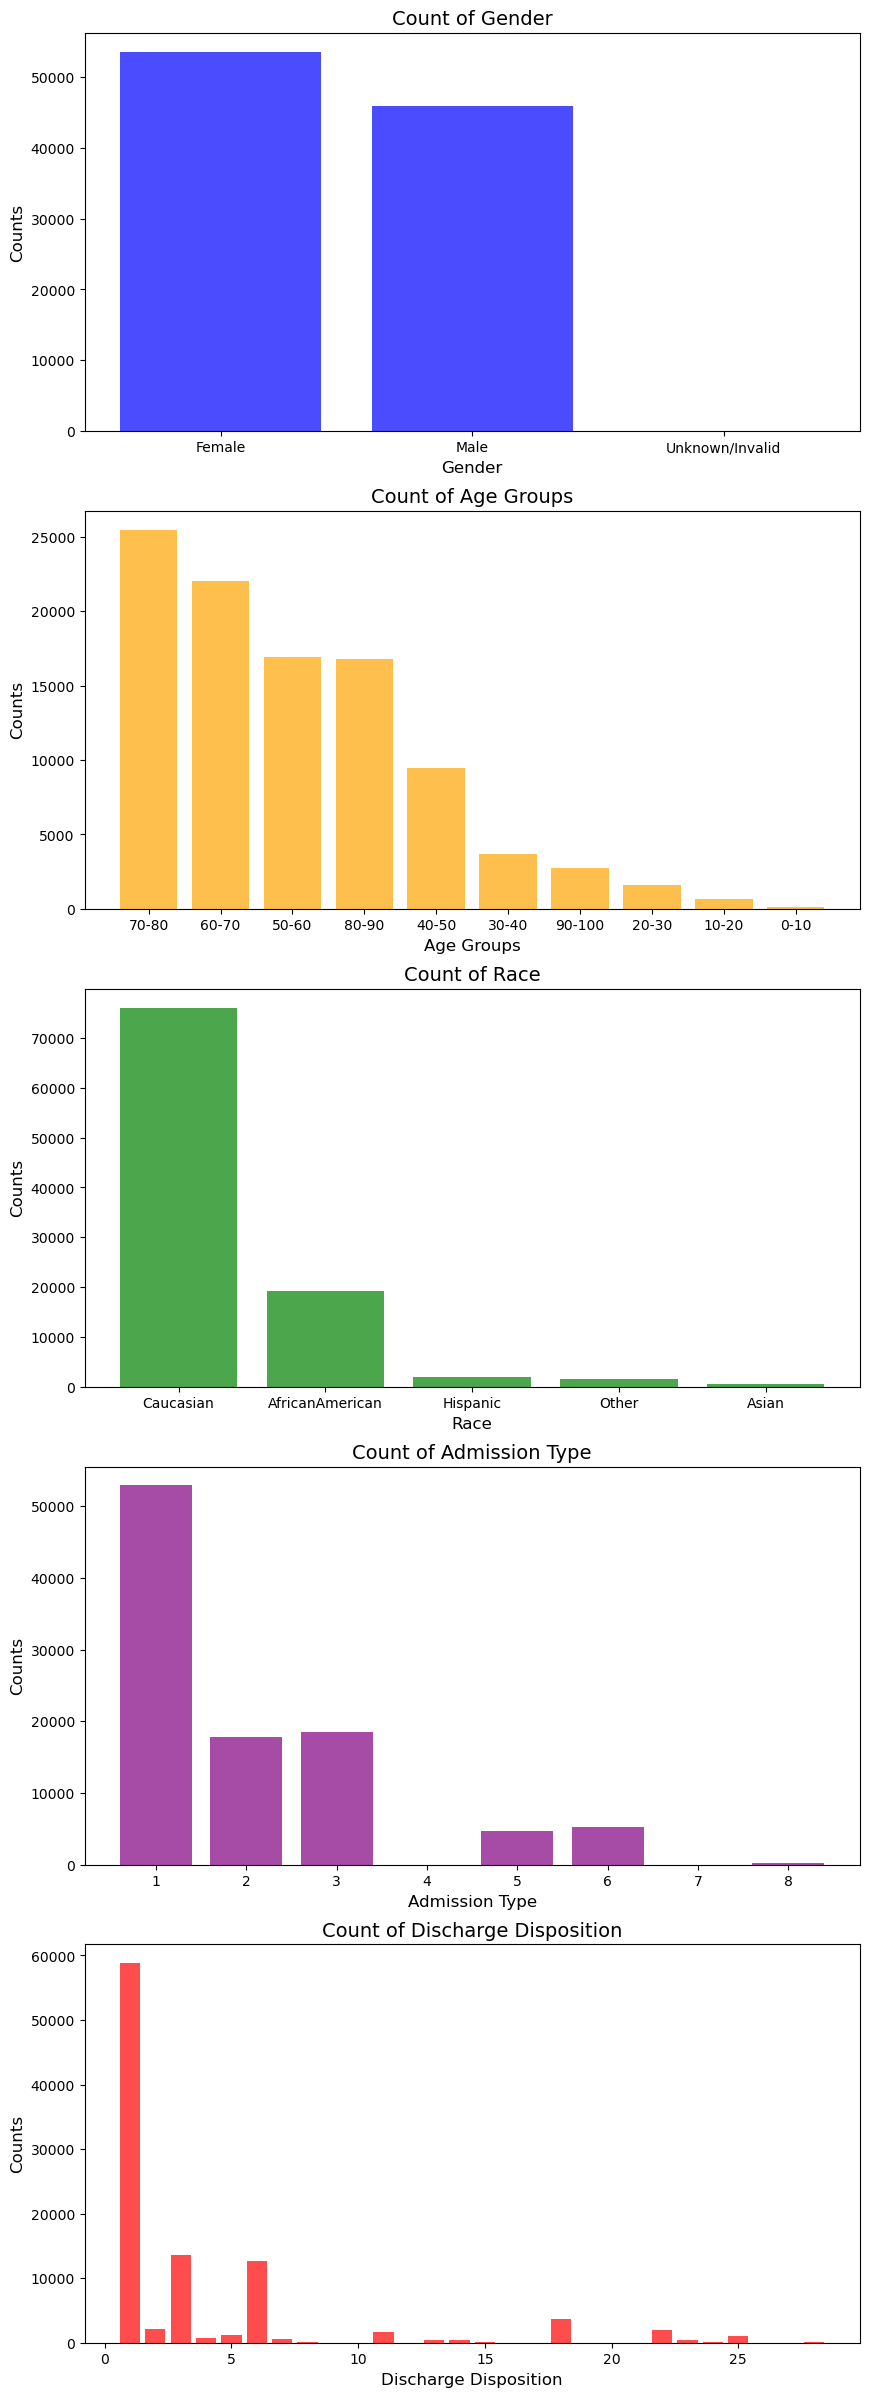

In [117]:
#Bar charts of categorical variables
# Prepare count data for each categorical variable
gender_counts = subset_df['gender'].value_counts()
age_counts = subset_df['age'].value_counts()
race_counts = subset_df['race'].value_counts()
admission_counts = subset_df['admission_type_id'].value_counts()
discharge_counts = subset_df['discharge_disposition_id'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))  

# Bar chart for Gender
axes[0].bar(gender_counts.index, gender_counts.values, color='blue', alpha=0.7)
axes[0].set_title('Count of Gender', fontsize=14)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Counts', fontsize=12)

# Bar chart for Age
axes[1].bar(age_counts.index, age_counts.values, color='orange', alpha=0.7)
axes[1].set_title('Count of Age Groups', fontsize=14)
axes[1].set_xlabel('Age Groups', fontsize=12)
axes[1].set_ylabel('Counts', fontsize=12)

# Bar chart for Race
axes[2].bar(race_counts.index, race_counts.values, color='green', alpha=0.7)
axes[2].set_title('Count of Race', fontsize=14)
axes[2].set_xlabel('Race', fontsize=12)
axes[2].set_ylabel('Counts', fontsize=12)

# Bar chart for Admission Type
axes[3].bar(admission_counts.index, admission_counts.values, color='purple', alpha=0.7)
axes[3].set_title('Count of Admission Type', fontsize=14)
axes[3].set_xlabel('Admission Type', fontsize=12)
axes[3].set_ylabel('Counts', fontsize=12)

# Bar chart for Discharge Disposition
axes[4].bar(discharge_counts.index, discharge_counts.values, color='red', alpha=0.7)
axes[4].set_title('Count of Discharge Disposition', fontsize=14)
axes[4].set_xlabel('Discharge Disposition', fontsize=12)
axes[4].set_ylabel('Counts', fontsize=12)

# Display the plot
plt.show()

#### Pivot Charts

<Axes: title={'center': 'Mean Time in Hospital by Age Group and Gender'}, ylabel='age'>

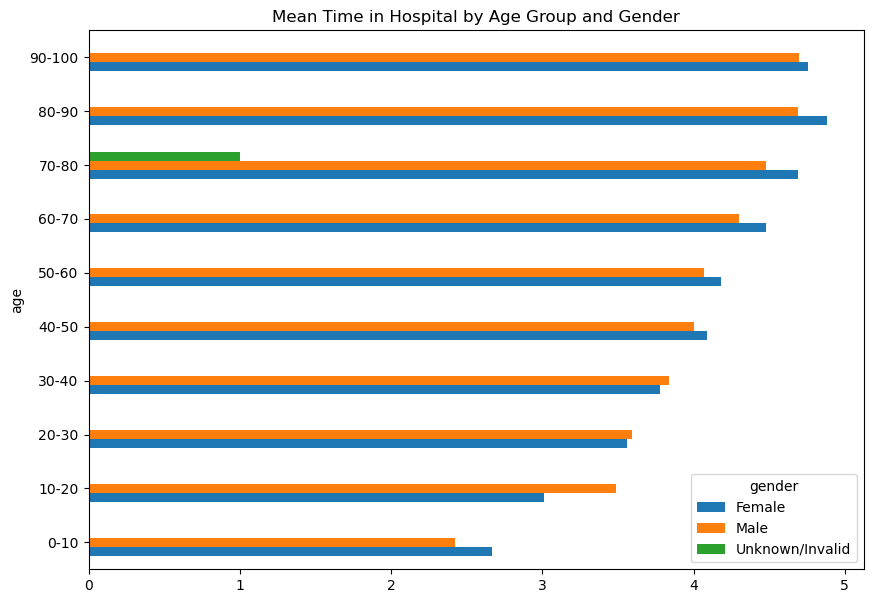

In [106]:
#Bar chart of Mean time in hospital by Age and Gender 
np.round(pd.pivot_table(subset_df, values='time_in_hospital', 
                                index=['age'], 
                                columns=['gender'], 
                                aggfunc='mean',
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean Time in Hospital by Age Group and Gender')

<Axes: title={'center': 'Mean Time in Hospital by Age Group and Race'}, ylabel='age'>

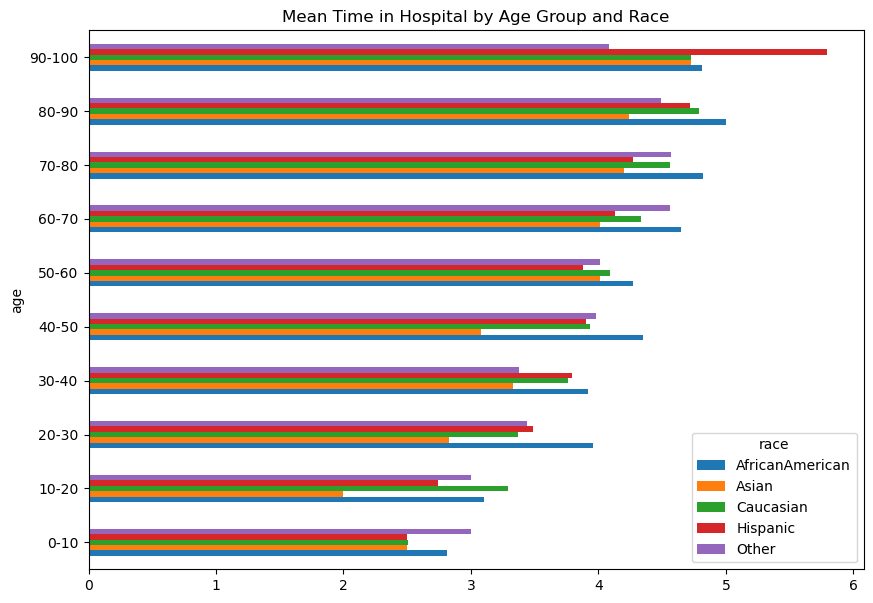

In [107]:
#Bar chart of Mean time in hospital by Age and Race
np.round(pd.pivot_table(subset_df, values='time_in_hospital', 
                                index=['age'], 
                                columns=['race'], 
                                aggfunc='mean',
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean Time in Hospital by Age Group and Race')

<Axes: title={'center': 'Mean Time in Hospital by Age Group and Admission Type'}, ylabel='age'>

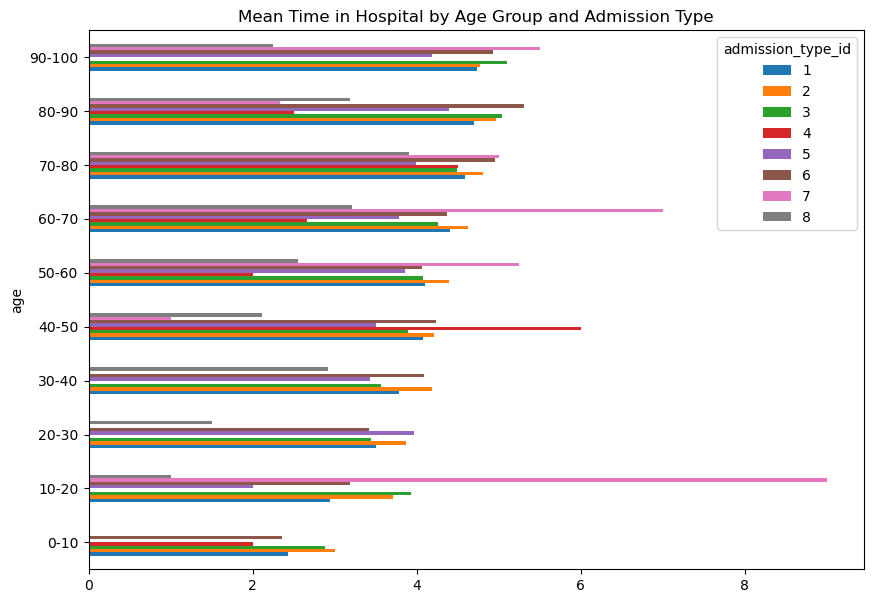

In [108]:
#Bar chart of Mean time in hospital by Age and Admission Type
np.round(pd.pivot_table(subset_df, values='time_in_hospital', 
                                index=['age'], 
                                columns=['admission_type_id'], 
                                aggfunc='mean',
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean Time in Hospital by Age Group and Admission Type')

In [109]:
#Bar chart of Mean time in hospital and number of procedures given Age
pivot = np.round(pd.pivot_table(subset_df, values=['time_in_hospital', 'num_procedures'], 
                                index=['age'], 
                                aggfunc='mean',
                                fill_value=0),2)
                                
pivot = pivot.reindex(pivot['time_in_hospital'].sort_values(ascending=False).index).nlargest(10, 'time_in_hospital')

pivot.style.format({'time_in_hospital': '{:.2f}',
                   'num_procedures': '{:.2f}'}).bar(color='#d65f5f')


,num_procedures,time_in_hospital
age,,
80-90,1.03,4.80
90-100,0.68,4.74
70-80,1.38,4.60
60-70,1.57,4.39
50-60,1.55,4.13
40-50,1.34,4.05
30-40,1.12,3.80
20-30,0.77,3.57
10-20,0.33,3.21


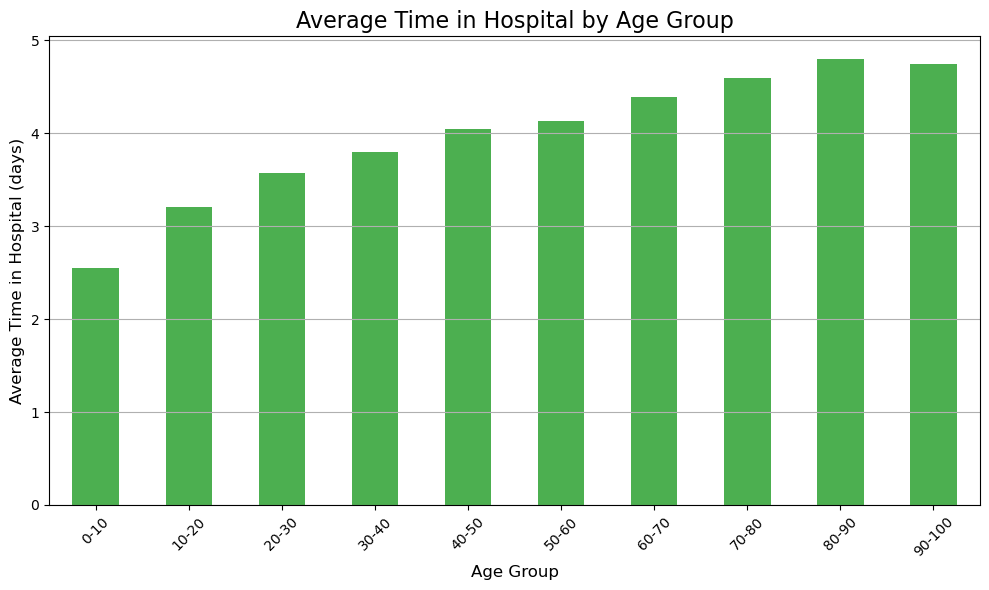

In [110]:
#Bar chart of average time in hospital by age group
mean_time_in_hospital = subset_df.groupby('age')['time_in_hospital'].mean().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
mean_time_in_hospital.plot(kind='bar', color='#4CAF50')

# Set the title and labels
plt.title('Average Time in Hospital by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Time in Hospital (days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()